In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('BIKE DETAILS.csv')



In [22]:
# Q1  What is the range of selling prices in the dataset ?

Maximum_price = df["selling_price"].max()
Minimum_price = df['selling_price'].min()
Range = (Maximum_price - Minimum_price)
print(f'Maximum selling price is: {Maximum_price}')
print(f'Minimum selling price is: {Minimum_price}')
print(f'Range of selling price is: {Range}')


Maximum selling price is: 760000
Minimum selling price is: 5000
Range of selling price is: 755000


In [4]:
# Q2  What is the median selling price for bikes in the dataset ?
sorted_value =  df["selling_price"].sort_values(ascending = False )
median = sorted_value.median()
print("The median of the selling price is",median )

The median of the selling price is 45000.0


In [5]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [6]:
# 3.  What is the most common seller type ?
df['seller_type'].unique()
count = df['seller_type'].value_counts()
# insight >> the individual seller type count is 1055 so the most common seller type  is individual
print("The most common seller type is Individual")

The most common seller type is Individual


In [7]:
#4 How many bikes have driven more than 50,000 kilometers ?
more_driven = df[df['km_driven'] > 50000]
more_than_50k = len(more_driven)
print(f'There are {more_than_50k} bikes are driven more than 50,000 kilometers')

There are 170 bikes are driven more than 50,000 kilometers


In [8]:
#5  What is the average km_driven value for each ownership type ?
unique = df["owner"].unique()
print(unique)

owner1 = df[df["owner"] == "1st owner"]
fst_owner = owner1.km_driven.mean()
print("Average km driven by fist owner is:", fst_owner)

owner2 =  df[df["owner"] == "2nd owner"]
second_owner = owner2.km_driven.mean()
print("Average km driven by second owner is:", second_owner)

owner3 =  df[df["owner"] == "3rd owner"]
third_owner = owner3.km_driven.mean()
print("Average km driven by third owner is:", third_owner)

owner4 =  df[df["owner"] == "4th owner"]
fourth_owner = owner4.km_driven.mean()
print("Average km driven by fourth owner is:", fourth_owner)
print()

print("Using Groupby")
average_km_driven = df.groupby("owner")["km_driven"].mean()
print(average_km_driven)

['1st owner' '2nd owner' '3rd owner' '4th owner']
Average km driven by fist owner is: 32816.583333333336
Average km driven by second owner is: 39288.9918699187
Average km driven by third owner is: 33292.181818181816
Average km driven by fourth owner is: 311500.0

Using Groupby
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [9]:
#6. What proportion of bikes are from the year 2015 or older ?

older_bikes = df[df['year'] <= 2015]

proportion = len(older_bikes)/len(df)

print(f'The proportion of the older bikes from the year 2015 is: {proportion:.3f}')

The proportion of the older bikes from the year 2015 is: 0.566


ex_showroom_price
False    626
True     435
Name: count, dtype: int64


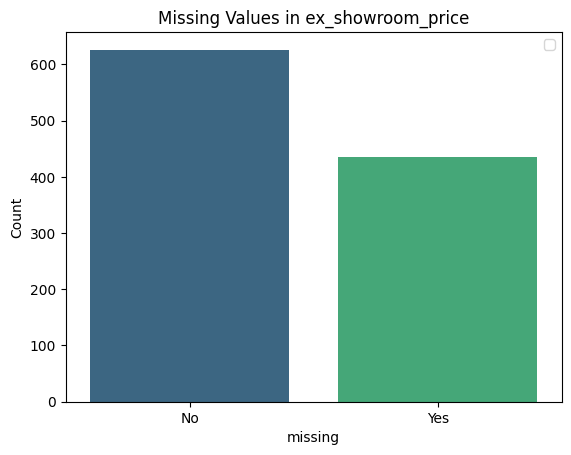

In [10]:
#7 What is the trend of missing values across the dataset ?

# Here only the missing values in the showroom price
missing_values = df["ex_showroom_price"].isnull().value_counts()
print(missing_values)
sns.barplot(missing_values, color = 'g',palette='viridis')
plt.title("Missing Values in ex_showroom_price")
plt.xticks(ticks = [0,1], labels = ["No","Yes"])
plt.xlabel("missing")
plt.ylabel("Count")
plt.legend()
plt.show()

In [11]:
#8.  What is the highest ex_showroom_price recorded, and for which bike ?

# maximum price
max_price = df["ex_showroom_price"].max()

# Data frame of the maximum price bike
bike_name = df[df['ex_showroom_price'] == max_price]

# Name of the maximum price bike
name = bike_name["name"]

print(f'The maximum showroom price is{max_price} and the name of the bike is {name} ')

The maximum showroom price is1278000.0 and the name of the bike is 134    Harley-Davidson Street Bob
Name: name, dtype: object 


In [12]:
#9. What is the total number of bikes listed by each seller type ?

# count the number of bikes listed by each dealer 
Total_bikes =  df.groupby("seller_type").size()
Total_bikes

seller_type
Dealer           6
Individual    1055
dtype: int64

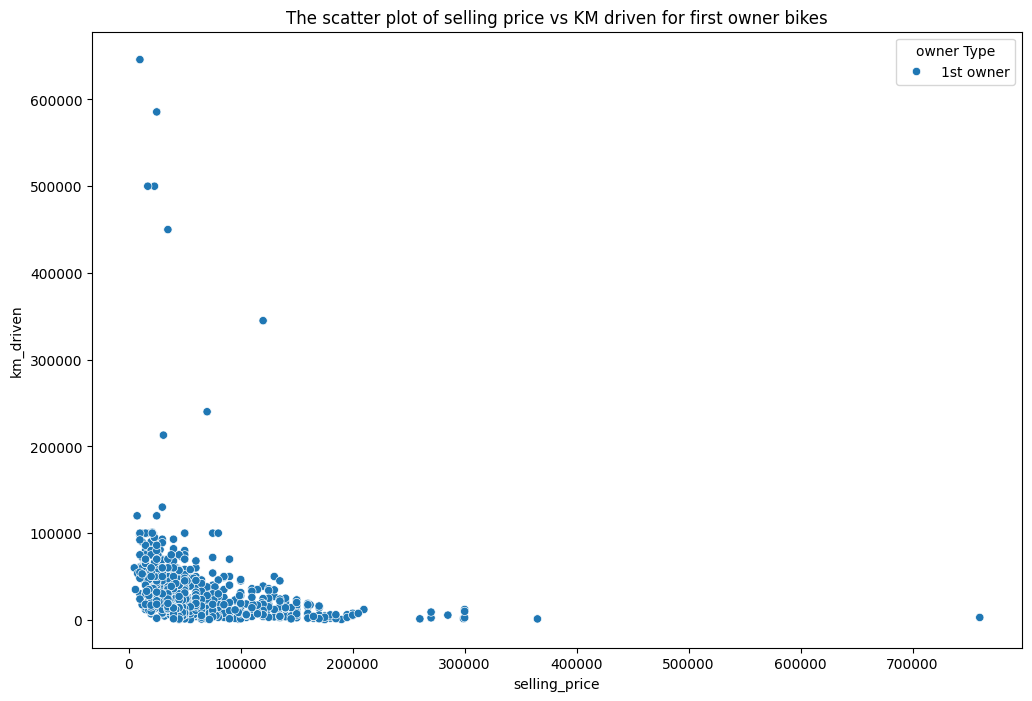

In [13]:
#10  What is the relationship between selling_price and km_driven for first-owner bikes ?

fst_owner = df[df["owner"] == "1st owner"]

plt.figure(figsize = (12,8))
sns.scatterplot(x = "selling_price", y ="km_driven", data = fst_owner, hue = 'owner')
plt.title("The scatter plot of selling price vs KM driven for first owner bikes")
plt.legend(title = "owner Type")
plt.show()

# Insights >> Mostly the selling price of  first owner is less than 1 lakh and the kilometer driven is also less than 1 lakh kilometer

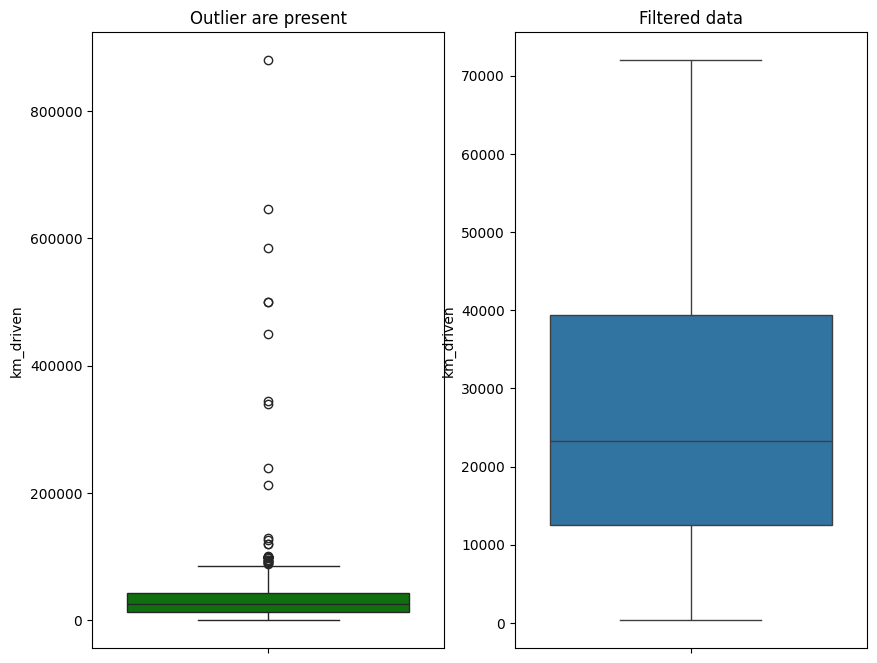

In [14]:
#Q11 Identify and remove outliers in the km_driven column using the IQR method.


Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

# Lower bound
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0* IQR
df_filtered = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.boxplot(df['km_driven'], color = "g")
plt.title("Outlier are present")

plt.subplot(1,2,2)
sns.boxplot(df_filtered["km_driven"])
plt.title("Filtered data")
plt.show()
        

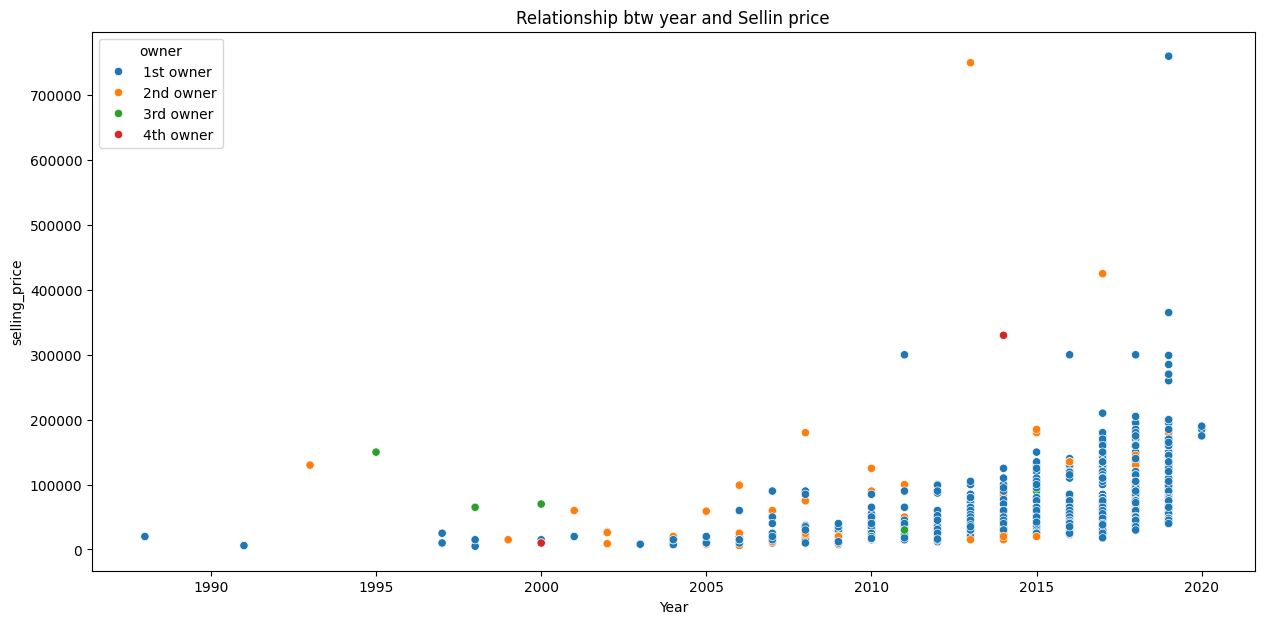

In [15]:
#12 Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize = (15,7))
sns.scatterplot(x = 'year', y = 'selling_price', data = df, hue = 'owner')
plt.title("Relationship btw year and Sellin price")
plt.xlabel("Year")
plt.show()

# Insight >> The bikes which were manufactured between 2015 and 2020 have sold more by high selling price.

In [16]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [17]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year).

import pandas as pd


# Calculate bike's age
current_year = 2025
df['bike_age'] = current_year - df['year']

# Calculate the depreciation for each bike
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Group by bike's age and calculate the average depreciation
average_depreciation = df.groupby('bike_age')['depreciation'].mean()

# Print the average depreciation for each bike age
for age, depreciation in average_depreciation.items():
    print(f'The average depreciation in selling price for bikes aged {age} years is {depreciation:.2f}')


The average depreciation in selling price for bikes aged 5 years is -34260.00
The average depreciation in selling price for bikes aged 6 years is 2954.56
The average depreciation in selling price for bikes aged 7 years is 13023.19
The average depreciation in selling price for bikes aged 8 years is 22306.08
The average depreciation in selling price for bikes aged 9 years is 28328.19
The average depreciation in selling price for bikes aged 10 years is 28013.28
The average depreciation in selling price for bikes aged 11 years is 34505.61
The average depreciation in selling price for bikes aged 12 years is 43086.89
The average depreciation in selling price for bikes aged 13 years is 37317.65
The average depreciation in selling price for bikes aged 14 years is 47102.67
The average depreciation in selling price for bikes aged 15 years is 45658.93
The average depreciation in selling price for bikes aged 16 years is 38227.79
The average depreciation in selling price for bikes aged 17 years is 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
 7   bike_age           1061 non-null   int64  
 8   depreciation       626 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 74.7+ KB


0        87958.714058
1        87958.714058
2       148114.000000
3        89643.000000
4        87958.714058
            ...      
1056     52000.000000
1057     51000.000000
1058     57000.000000
1059     58000.000000
1060     75000.000000
Name: treatment_ex_showroom_price, Length: 1061, dtype: float64

In [48]:
#14. Which bike names are priced significantly above the average price for their manufacturing year ?

# Fill the missing value of showroom_price with average value
df["treatment_ex_showroom_price"] = df["ex_showroom_price"].fillna(df["ex_showroom_price"].mean())
df.treatment_ex_showroom_price

# Average selling price of bikes
average_price = df["treatment_ex_showroom_price"].mean()

# Data frame of bikes.csv where showroom price is greater than average price
bike_name_above_average_price =  df[df["treatment_ex_showroom_price"] > average_price]

# Extract only the name and year columns
bike_name_and_year = bike_name_above_average_price[["name","year"]]
bike_name_and_year

,name,year
0,Royal Enfield Classic 350,2019
1,Honda Dio,2017
2,Royal Enfield Classic Gunmetal Grey,2018
3,Yamaha Fazer FI V 2.0 [2016-2018],2015
4,Yamaha SZ [2013-2014],2011
...,...,...
1020,Bajaj Avenger Street 220,2013
1022,Bajaj Pulsar NS 200,2014
1023,Bajaj Avenger 220 dtsi,2012
1036,Honda Karizma,2013


                             selling_price      year  km_driven  \
selling_price                     1.000000  0.402188  -0.212937   
year                              0.402188  1.000000  -0.288675   
km_driven                        -0.212937 -0.288675   1.000000   
ex_showroom_price                 0.918583  0.126378  -0.122011   
treatment_ex_showroom_price       0.750451  0.068111  -0.082539   

                             ex_showroom_price  treatment_ex_showroom_price  
selling_price                         0.918583                     0.750451  
year                                  0.126378                     0.068111  
km_driven                            -0.122011                    -0.082539  
ex_showroom_price                     1.000000                     1.000000  
treatment_ex_showroom_price           1.000000                     1.000000  


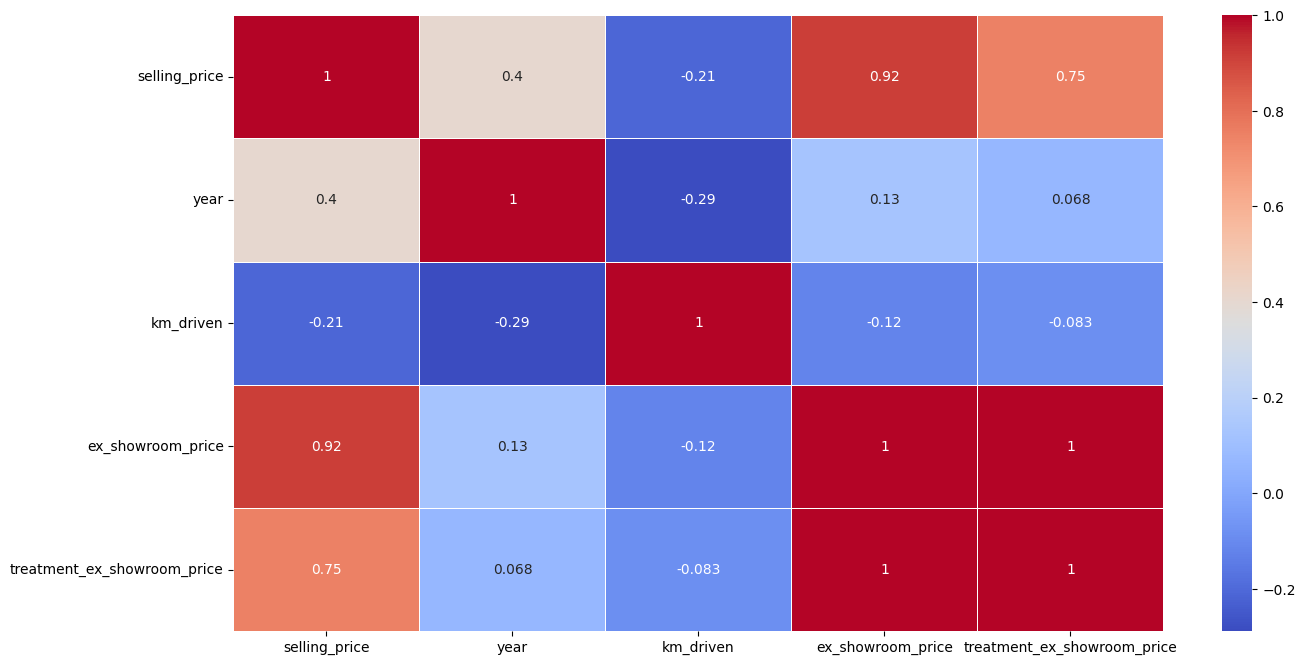

In [49]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)

plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.show()